In [1]:
# pipenv install scikit-learn pandas numpy scipy matplotlib seaborn ipykernel gradio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar o conjunto de dados
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [3]:
# Checar a estrutura do DataFrame
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Remover a coluna 'id' que não é relevante para a análise
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [5]:
# Renomear colunas para facilitar o acesso
df_colesterol.columns = [
  'grupo_sanguineo', 
  'fumante', 
  'nivel_atividade_fisica', 
  'idade', 
  'peso', 
  'altura', 
  'colesterol']

In [6]:
# Colar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [7]:
# Colar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

### **EDA**

In [8]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [9]:
# Verificar os valores possível
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [10]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
colesterol                0
dtype: int64

In [11]:
# Medidas estatísiticas do DataFrame
df_colesterol_eda.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [12]:
# Coletar medidas das variáveis categóricas
moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade_fisica = df_colesterol_eda.nivel_atividade_fisica.mode()

In [13]:
# Coletar medidas das variáveis numéricas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [14]:
# Inputar valores ausentes
df_colesterol_eda.fillna({
  'grupo_sanguineo': moda_grupo_sanguineo[0],
  'fumante': moda_fumante[0],
  'nivel_atividade_fisica': moda_nivel_atividade_fisica[0],
  'idade': mediana_idade,
  'peso': mediana_peso,
  'altura': mediana_altura
}, inplace=True)

In [15]:
# Converter idade e altura para inteiros
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [26]:
# Estrutura do DataFrame após o tratamento de dados
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         963 non-null    object 
 1   fumante                 963 non-null    object 
 2   nivel_atividade_fisica  963 non-null    object 
 3   idade                   963 non-null    int64  
 4   peso                    963 non-null    float64
 5   altura                  963 non-null    int64  
 6   colesterol              963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


In [17]:
# Visualizar o DataFrame tratado
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


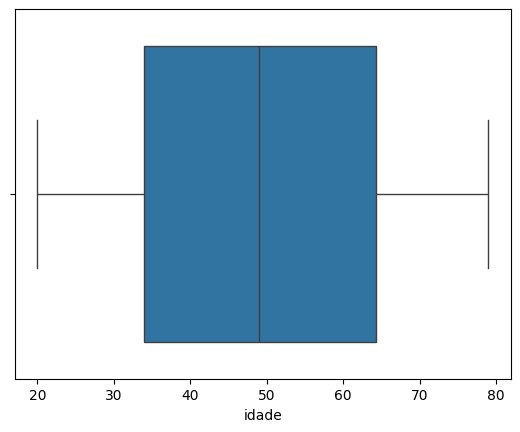

In [18]:
# Verificar/detectar valores outliers incomuns no DataFrame tratado
sns.boxplot(data=df_colesterol_eda, x='idade')
plt.show()

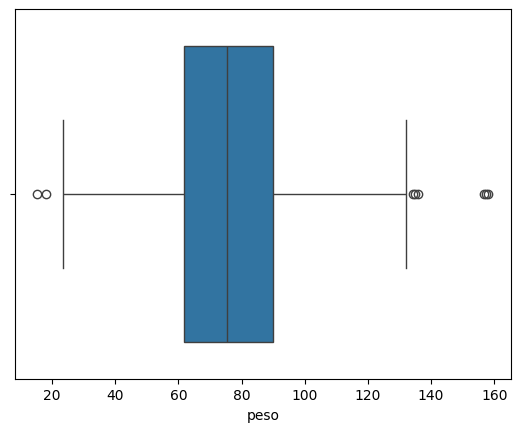

In [19]:
# Verificar/detectar valores outliers incomuns no DataFrame tratado
sns.boxplot(data=df_colesterol_eda, x='peso')
plt.show()

In [20]:
# Devido aos outliers incomuns, decidimos não tratar/remover esses valores para manter 
# a integridade do conjunto de dados.

# Filtrar o público a ser removido
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [24]:
# Remover o público com peso menor que 40kg
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

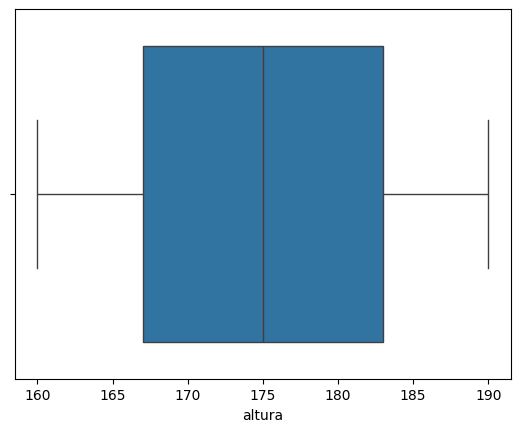

In [25]:
# Verificar/detectar valores outliers incomuns no DataFrame tratado
sns.boxplot(data=df_colesterol_eda, x='altura')
plt.show()

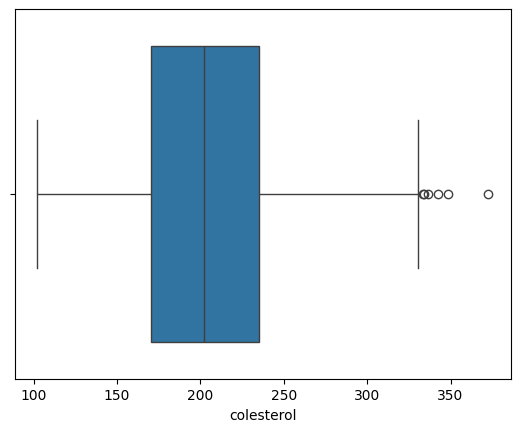

In [27]:
# Verificar/detectar valores outliers incomuns no DataFrame tratado
sns.boxplot(data=df_colesterol_eda, x='colesterol')
plt.show()